This notebook will be for the data analysis of First Turn Cast data. The goal is to move from Tableau to Python for doing data analysis.

In [60]:
## import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

pd.set_option('display.expand_frame_repr', False)

In [2]:
user_data = pd.read_excel("FirstTurnCombined.xlsx")
user_data.info()
list(user_data.columns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Columns: 165 entries, id to work_place_dice
dtypes: float64(32), int64(118), object(15)
memory usage: 174.1+ KB


['id',
 'game',
 'season',
 'play_length',
 'box_length',
 'time_delta',
 'complexity',
 'rating',
 'rank',
 'live',
 'start_player',
 'winner',
 'bp_score',
 'bp_score_normal',
 'bp_score_adjusted',
 'bp_pickup',
 'bp_play_again',
 'eric_score',
 'eric_score_normal',
 'eric_score_adjusted',
 'eric_pickup',
 'eric_play_again',
 'kiwi_score',
 'kiwi_score_normal',
 'kiwi_score_adjusted',
 'kiwi_pickup',
 'kiwi_play_again',
 'kait_score',
 'kait_score_normal',
 'kait_score_adjusted',
 'kait_pickup',
 'kait_play_again',
 'paxton_score',
 'paxton_score_normal',
 'paxton_score_adjusted',
 'paxton_pickup',
 'paxton_play_again',
 'min_normal',
 'average_normal',
 'max_normal',
 'normal_spread',
 'all_played',
 'bgg_mean',
 'bgg_std_dev',
 'bgg_min',
 'bgg_max',
 'bgg_1stq',
 'bgg_3rdq',
 'bgg_median',
 'total_mechanics',
 'advantage_token',
 'area_majority_influence',
 'area_movement',
 'action_drafting',
 'action_event',
 'action_points',
 'action_retrieval',
 'action_queue',
 'asym_info',
 

In [3]:
user_data.describe(include='all')

,id,game,season,play_length,box_length,time_delta,complexity,rating,rank,live,...,turn_role,turn_stat_based,turn_to_pass,turn_progressive,variable_player_powers,variable_phase_order,variable_setup,vp_as_resource,worker_placement,work_place_dice
count,135.000000,135,135.000000,128.000000,135.000000,132.000000,133.000000,132.000000,132.000000,134,...,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
unique,NaN,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,7 Wonders Duel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,106,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,68.044444,NaN,2.088889,70.273438,52.844444,15.969697,2.231895,7.446212,1323.689394,NaN,...,0.014815,0.022222,0.022222,0.022222,0.222222,0.037037,0.044444,0.014815,0.088889,0.014815
std,39.189525,NaN,0.796135,44.020703,29.880575,29.913601,0.647425,0.457909,2218.570742,NaN,...,0.121261,0.147955,0.147955,0.147955,0.417288,0.189556,0.206848,0.121261,0.285643,0.121261
min,1.000000,NaN,1.000000,15.000000,12.000000,-75.000000,1.000000,6.100000,1.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.500000,NaN,1.000000,40.000000,30.000000,0.000000,1.830000,7.200000,251.500000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,68.000000,NaN,2.000000,60.000000,45.000000,10.000000,2.150000,7.400000,487.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,101.500000,NaN,3.000000,90.000000,60.000000,30.000000,2.520000,7.700000,1089.250000,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [4]:
user_data.head()

,id,game,season,play_length,box_length,time_delta,complexity,rating,rank,live,...,turn_role,turn_stat_based,turn_to_pass,turn_progressive,variable_player_powers,variable_phase_order,variable_setup,vp_as_resource,worker_placement,work_place_dice
0,1,7 Wonders Duel,1,60.0,30,30.0,2.22,8.1,17.0,No,...,0,0,0,0,0,0,0,0,0,0
1,2,Altiplano,1,150.0,90,60.0,3.31,7.6,277.0,No,...,0,0,0,0,1,0,0,0,0,0
2,3,Arboretum,1,40.0,30,10.0,2.15,7.4,252.0,No,...,0,0,0,0,0,0,0,0,0,0
3,4,Biblios,1,40.0,30,10.0,1.68,7.2,324.0,No,...,0,0,0,0,0,0,0,0,0,0
4,5,Call to Adventure,1,75.0,45,30.0,2.00,7.4,1114.0,Yes,...,0,0,0,0,0,0,0,0,0,0


In [5]:
season_one = user_data[(user_data['season'] == 1) & (user_data['all_played'] == 'yes') & (user_data['min_normal'].notnull())]
season_two = user_data[(user_data['season'] == 2) & (user_data['all_played'] == 'yes') & (user_data['min_normal'].notnull())]
season_three = user_data[(user_data['season'] == 3) & (user_data['all_played'] == 'yes') & (user_data['min_normal'].notnull())]

In [6]:
print(f'There were {len(user_data[user_data["season"] == 3]) - 1} games played this season.')
print(f'There were {len(season_three["game"]) - 1} games played by all the hosts.')

There were 48 games played this season.
There were 24 games played by all the hosts.


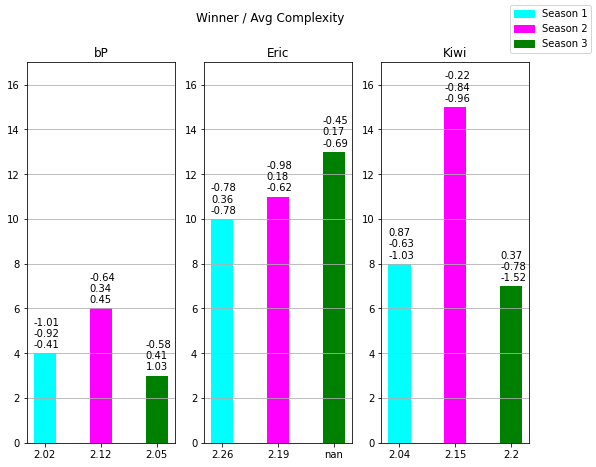

In [7]:
def build_player_wins(fig, pos, player):
  season_wins = [
    season_one[season_one['winner'] == player].count()[0],
    season_two[season_two['winner'] == player].count()[0],
    season_three[season_three['winner'] == player].count()[0]
  ]
  season_complexity = [
    str(round(np.median(season_one[season_one['winner'] == player]['complexity']), 2)),
    str(round(np.median(season_two[season_two['winner'] == player]['complexity']), 2)),
    str(round(np.median(season_three[season_three['winner'] == player]['complexity']), 2))
  ]
  play_fig = fig.add_subplot(pos)
  play_fig.bar(season_complexity, season_wins, width=0.4, color=['cyan', 'magenta', 'green'])
  play_fig.set_ylim(0,17)
  play_fig.set_title(f'{player}')
  play_fig.text(-0.2, season_wins[0] + 0.25, round(np.median(season_one[season_one['winner'] == player]['bp_score_adjusted']), 2))
  play_fig.text(-0.2, season_wins[0] + 0.75, round(np.median(season_one[season_one['winner'] == player]['eric_score_adjusted']), 2))
  play_fig.text(-0.2, season_wins[0] + 1.25, round(np.median(season_one[season_one['winner'] == player]['kiwi_score_adjusted']), 2))
  play_fig.text(0.8, season_wins[1] + 0.25, round(np.median(season_two[season_two['winner'] == player]['bp_score_adjusted']), 2))
  play_fig.text(0.8, season_wins[1] + 0.75, round(np.median(season_two[season_two['winner'] == player]['eric_score_adjusted']), 2))
  play_fig.text(0.8, season_wins[1] + 1.25, round(np.median(season_two[season_two['winner'] == player]['kiwi_score_adjusted']), 2))
  play_fig.text(1.8, season_wins[2] + 0.25, round(np.median(season_three[season_three['winner'] == player]['bp_score_adjusted']), 2))
  play_fig.text(1.8, season_wins[2] + 0.75, round(np.median(season_three[season_three['winner'] == player]['eric_score_adjusted']), 2))
  play_fig.text(1.8, season_wins[2] + 1.25, round(np.median(season_three[season_three['winner'] == player]['kiwi_score_adjusted']), 2))
  play_fig.grid(True, axis='y')
  return play_fig

wins_and_complexity = plt.figure(figsize=(9,7))
wins_and_complexity.suptitle("Winner / Avg Complexity")
legend_cyan = mpatches.Patch(color='cyan', label='Season 1')
legend_magenta = mpatches.Patch(color='magenta', label='Season 2')
legend_green = mpatches.Patch(color='green', label='Season 3')
wins_and_complexity.legend(handles=[legend_cyan, legend_magenta, legend_green])
build_player_wins(wins_and_complexity, 131, 'bP')
build_player_wins(wins_and_complexity, 132, 'Eric')
build_player_wins(wins_and_complexity, 133, 'Kiwi')
plt.show()


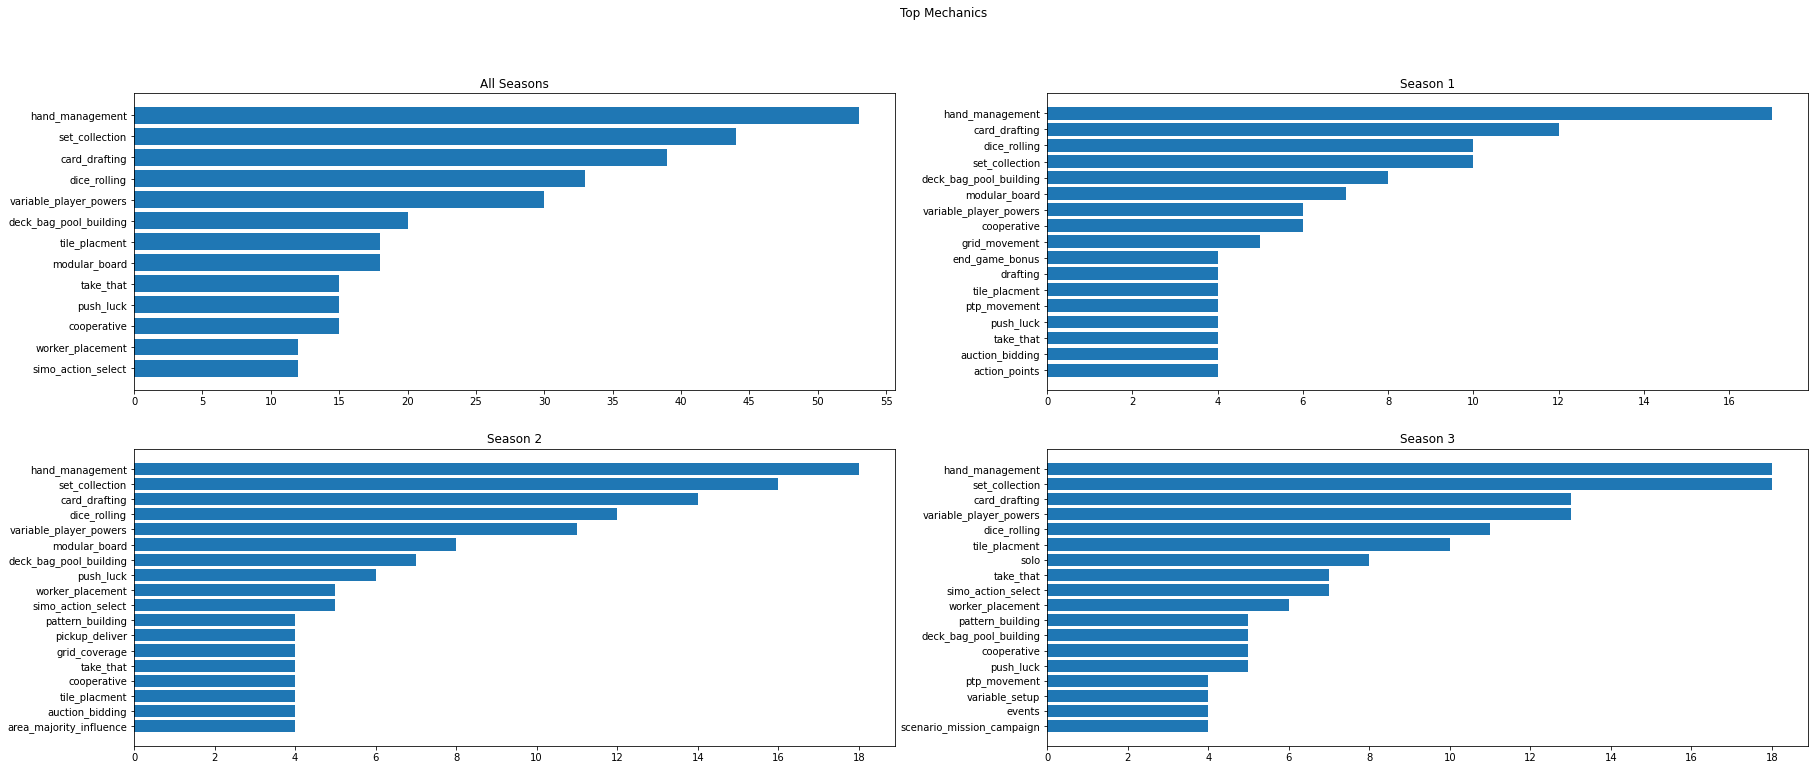

<Figure size 432x288 with 0 Axes>

In [66]:
total_mechs = user_data.loc[:,'advantage_token':'work_place_dice'].sum()
total_mechs_sOne = user_data[user_data['season']==1].loc[:,'advantage_token':'work_place_dice'].sum()
total_mechs_sTwo = user_data[user_data['season']==2].loc[:,'advantage_token':'work_place_dice'].sum()
total_mechs_sThree = user_data[user_data['season']==3].loc[:,'advantage_token':'work_place_dice'].sum()
filter_mechs = total_mechs.where(total_mechs >= 12)
filter_mechs_sOne = total_mechs_sOne.where(total_mechs_sOne >= 4)
filter_mechs_sTwo = total_mechs_sTwo.where(total_mechs_sTwo >= 4)
filter_mechs_sThree = total_mechs_sThree.where(total_mechs_sThree >= 4)
sorted_mechs = filter_mechs.dropna().sort_values(ascending=True)
sorted_mechs_sOne = filter_mechs_sOne.dropna().sort_values(ascending=True)
sorted_mechs_sTwo = filter_mechs_sTwo.dropna().sort_values(ascending=True)
sorted_mechs_sThree = filter_mechs_sThree.dropna().sort_values(ascending=True)
fig_mech = plt.figure(figsize=(30,12))
fig_mech.add_subplot(221).barh(sorted_mechs.head(18).keys(), sorted_mechs.head(18))
fig_mech.add_subplot(222).barh(sorted_mechs_sOne.keys(), sorted_mechs_sOne)
fig_mech.add_subplot(223).barh(sorted_mechs_sTwo.keys(), sorted_mechs_sTwo)
fig_mech.add_subplot(224).barh(sorted_mechs_sThree.keys(), sorted_mechs_sThree)
fig_mech.axes[0].set_title('All Seasons')
fig_mech.axes[1].set_title('Season 1')
fig_mech.axes[2].set_title('Season 2')
fig_mech.axes[3].set_title('Season 3')
fig_mech.axes[0].xaxis.set_major_locator(ticker.MultipleLocator(5))
fig_mech.axes[1].xaxis.set_major_locator(ticker.MultipleLocator(2))
fig_mech.axes[2].xaxis.set_major_locator(ticker.MultipleLocator(2))
fig_mech.axes[3].xaxis.set_major_locator(ticker.MultipleLocator(2))
fig_mech.suptitle('Top Mechanics')

plt.show()
plt.clf()

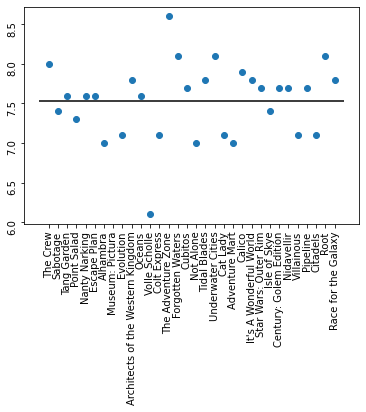

In [78]:
plt.plot(user_data[(user_data['season']==3) & (user_data['all_played'] == 'yes')]['game'], user_data[(user_data['season']==3) & (user_data['all_played'] == 'yes')]['rating'],'o')
plt.hlines(user_data[(user_data['season']==3) & (user_data['all_played'] == 'yes')]['rating'].mean(), -1, len(user_data[(user_data['season']==3) & (user_data['all_played'] == 'yes')]['game']), color='black')
plt.tick_params(rotation=90)
plt.show()

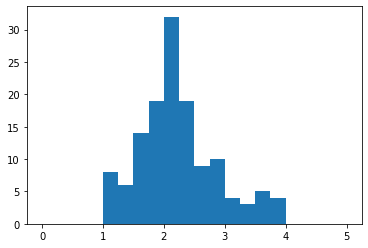

In [9]:
plt.hist(user_data['complexity'],range=(0,5),bins=20 )
plt.show()

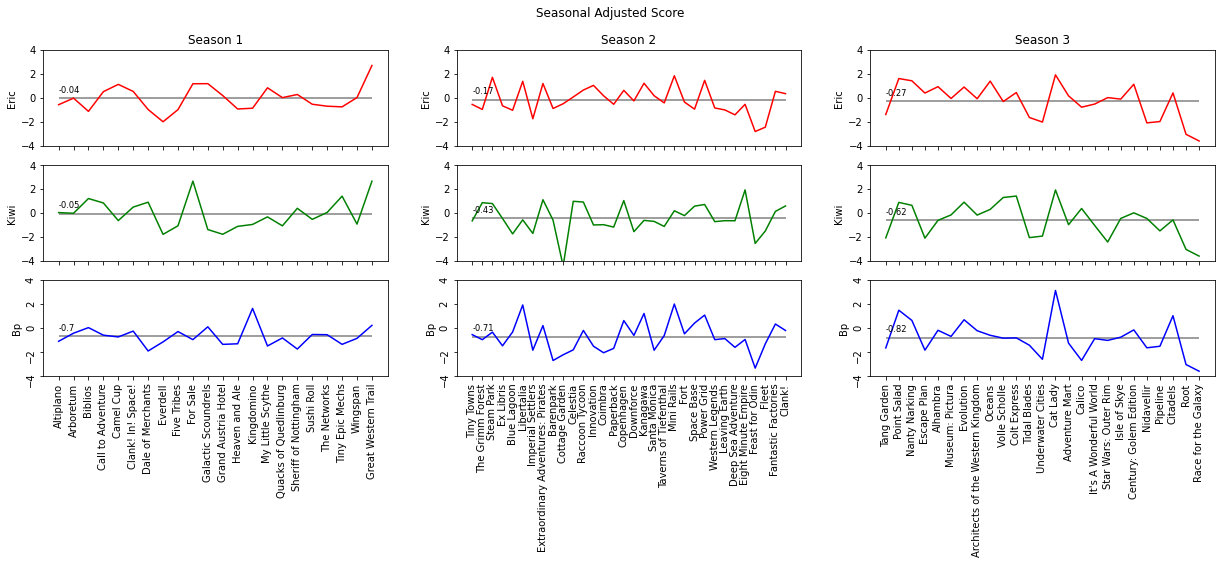

In [10]:
def build_adj_score(fig, pos, player, season, xlab=False):
  if player == 'eric':
    playColor = 'red'
  elif player == 'kiwi':
    playColor = 'green'
  elif player == 'bp':
    playColor = 'blue'
  else:
    playColor = 'black'
  play_fig = fig.add_subplot(pos)
  play_fig.plot(season['game'], season[f'{player}_score_adjusted'], color=playColor)
  play_fig.hlines(np.mean(season[f'{player}_score_adjusted']), 0, len(season['game'])-1, color ='grey')
  play_fig.text(0,np.mean(season[f'{player}_score_adjusted']) + 0.5,round(np.mean(season[f'{player}_score_adjusted']), 2),fontsize='small')
  if not xlab:
    play_fig.xaxis.set_ticklabels([])
  else:
    play_fig.tick_params(rotation=90)
  play_fig.set_ylim(-4,4)
  play_fig.set_ylabel(f'{player.capitalize()}')
  return play_fig

season_one_adjusted_figure = plt.figure(figsize=(21,6))
season_one_adjusted_figure.suptitle("Seasonal Adjusted Score")
build_adj_score(season_one_adjusted_figure, 331, 'eric', season_one)
season_one_adjusted_figure.axes[0].set_title('Season 1')
build_adj_score(season_one_adjusted_figure, 332, 'eric', season_two)
season_one_adjusted_figure.axes[1].set_title('Season 2')
build_adj_score(season_one_adjusted_figure, 333, 'eric', season_three)
season_one_adjusted_figure.axes[2].set_title('Season 3')
build_adj_score(season_one_adjusted_figure, 334, 'kiwi', season_one)
build_adj_score(season_one_adjusted_figure, 335, 'kiwi', season_two)
build_adj_score(season_one_adjusted_figure, 336, 'kiwi', season_three)
build_adj_score(season_one_adjusted_figure, 337, 'bp', season_one, True)
build_adj_score(season_one_adjusted_figure, 338, 'bp', season_two, True)
build_adj_score(season_one_adjusted_figure, 339, 'bp', season_three, True)

plt.show()